## Proyecto SQL

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

- Encuentra el número de libros publicados después del 1 de enero de 2000.
- Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [53]:
# importar librerías
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Numero de libros publicados despues del 01 enero de 2000


In [54]:
query1 = """
SELECT COUNT(*) AS books_after_2000
FROM books
WHERE publication_date > '2000-01-01';
"""
df1 = pd.io.sql.read_sql(query1, con=engine)
print("Libros publicados después del 1 de enero de 2000:", df1.iloc[0, 0])


Libros publicados después del 1 de enero de 2000: 819


Oportunidad de mercado para aplicaciones modernas
Dado que estos libros pertenecen a una era más reciente, es probable que estén disponibles en formato digital o sean más fácilmente adaptables a servicios de lectura en línea o recomendaciones personalizadas. Esto representa una ventaja para productos tecnológicos centrados en libros.

### Numero de reseñas y calificaciones promedio por libro


In [55]:
query2 = """
SELECT
    b.book_id,
    b.title,
    COUNT(DISTINCT r.review_id) AS num_reviews,
    ROUND(AVG(rt.rating),2) AS avg_rating
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY num_reviews DESC; 
"""

df2 = pd.io.sql.read_sql(query2, con=engine)
print ("Número de reseñas y calificaciones promedio por libro:")
df2.head(10)

Número de reseñas y calificaciones promedio por libro:


,book_id,title,num_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
5,696,The Da Vinci Code (Robert Langdon #2),6,3.83
6,627,The Alchemist,6,3.79
7,750,The Hobbit or There and Back Again,6,4.13
8,656,The Book Thief,6,4.26
9,779,The Lightning Thief (Percy Jackson and the Oly...,6,4.08


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_20312\3712946389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2.head(10), x="num_reviews", y="title", palette="viridis")


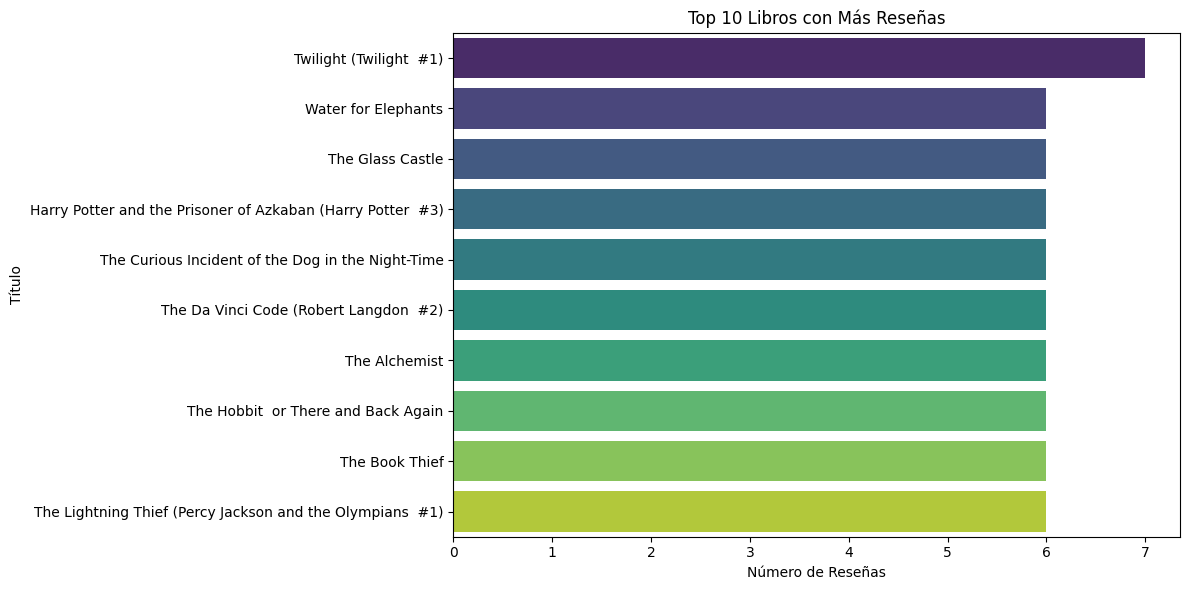

In [56]:
# Visualización: Top 10 libros con más reseñas
plt.figure(figsize=(12, 6))
sns.barplot(data=df2.head(10), x="num_reviews", y="title", palette="viridis")
plt.title("Top 10 Libros con Más Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Título")
plt.tight_layout()
plt.show()

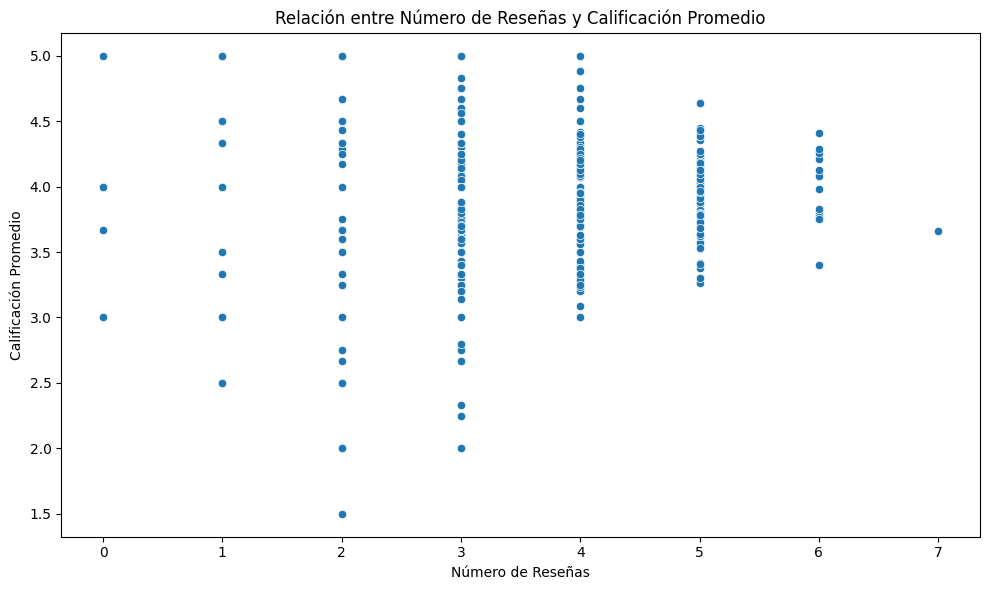

In [57]:
# Visualización: Relación entre número de reseñas y calificación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x="num_reviews", y="avg_rating")
plt.title("Relación entre Número de Reseñas y Calificación Promedio")
plt.xlabel("Número de Reseñas")
plt.ylabel("Calificación Promedio")
plt.tight_layout()
plt.show()

El gráfico muestra que no hay una relación lineal fuerte entre el número de reseñas y la calificación promedio, pero sí se observa que los libros con calificaciones moderadamente altas (4-5) tienden a atraer más reseñas. Los libros con pocas reseñas pueden tener calificaciones muy variadas, mientras que los libros muy reseñados generalmente mantienen calificaciones en el rango medio-alto. Esto sugiere que la popularidad (número de reseñas) y la percepción de calidad (calificación promedio) están relacionadas, pero no de manera determinante.

### Editorial con mas libros y con mas de 50 paginas

In [66]:
query3 = """
SELECT 
    p.publisher,
    COUNT(*) AS num_books
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY num_books DESC;
"""
df3 = pd.io.sql.read_sql(query3, con=engine)
print("Editorial con más libros de más de 50 páginas:", df3.iloc[0, 0])
df3

Editorial con más libros de más de 50 páginas: Penguin Books


,publisher,num_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
...,...,...
329,Turtleback,1
330,Atheneum Books for Young Readers: Richard Jack...,1
331,Penguin Signet,1
332,Victor Gollancz,1


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_20312\1685896666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3.head(10), x="num_books", y="publisher", palette="magma")


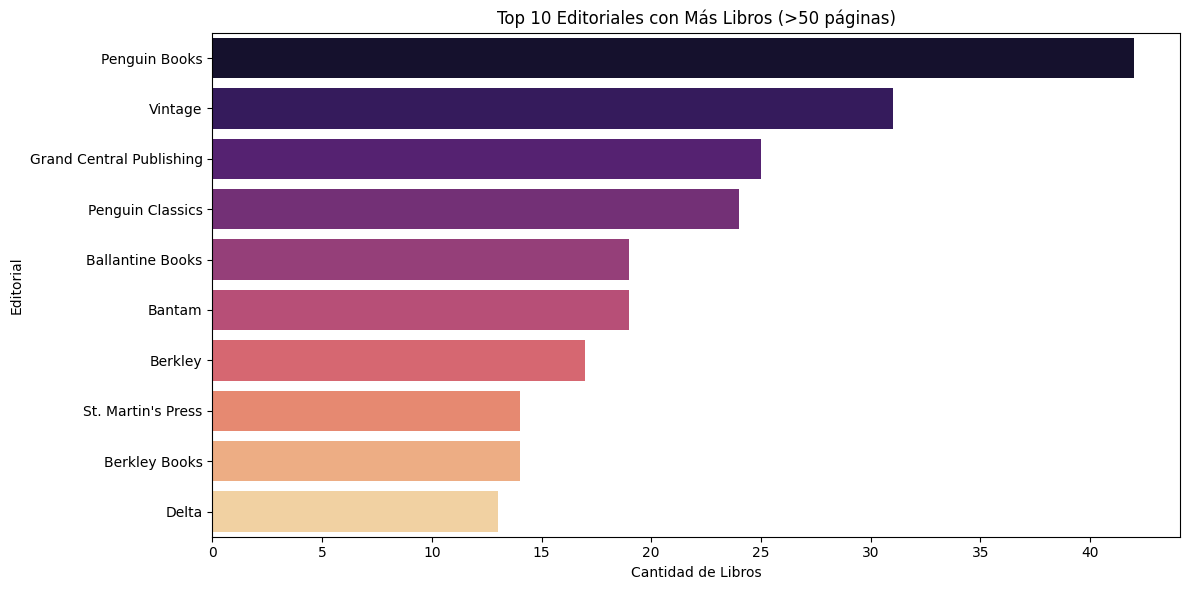

In [ ]:

# Visualización: Top 10 editoriales con más libros de más de 50 páginas
plt.figure(figsize=(12, 6))
sns.barplot(data=df3.head(10), x="num_books", y="publisher", palette="magma")
plt.title("Top 10 Editoriales con Más Libros (>50 páginas)")
plt.xlabel("Cantidad de Libros")
plt.ylabel("Editorial")
plt.tight_layout()
plt.show()

Recomendaciones:

- Cruzar estos datos con calificaciones promedio para determinar si las editoriales con más libros mantienen estándares de calidad.

- Investigar si hay diferencias por género literario (ej.: Penguin Classics para clásicos vs. Berkley para romance).

- Analizar el impacto de la autoedición (Amazon KDP) en este escenario, ya que no aparece en el gráfico pero es un actor relevante.

En resumen: El gráfico confirma el liderazgo de Penguin Books y sus sellos asociados, junto con otras grandes editoriales, en la producción de libros extensos. Esto subraya la concentración del mercado editorial en manos de unos pocos grupos, con menos espacio para editoriales independientes en este segmento.

### Autor con la mejor calificación promedio (mínimo 50 calificaciones)

In [60]:
query4 = """
WITH author_ratings AS (
    SELECT 
        b.author_id,
        COUNT(rt.rating) AS num_ratings,
        AVG(rt.rating) AS avg_rating
    FROM books b
    JOIN ratings rt ON b.book_id = rt.book_id
    GROUP BY b.author_id
    HAVING COUNT(rt.rating) >= 50
)
SELECT 
    a.author,
    ar.avg_rating,
    ar.num_ratings
FROM author_ratings ar
JOIN authors a ON ar.author_id = a.author_id
ORDER BY ar.avg_rating DESC;
"""
df4 = pd.io.sql.read_sql(query4, con=engine)
print("Autores con la mejor calificación promedio (mínimo 50 calificaciones):")
df4.head(10)


Autores con la mejor calificación promedio (mínimo 50 calificaciones):


,author,avg_rating,num_ratings
0,Diana Gabaldon,4.300000,50
1,J.K. Rowling/Mary GrandPré,4.288462,312
2,Agatha Christie,4.283019,53
3,Markus Zusak/Cao Xuân Việt Khương,4.264151,53
4,J.R.R. Tolkien,4.240964,166
5,Roald Dahl/Quentin Blake,4.209677,62
6,Louisa May Alcott,4.203704,54
7,Rick Riordan,4.130952,84
8,Arthur Golden,4.107143,56
9,Stephen King,4.009434,106


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_20312\3825561138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4.head(10), x="avg_rating", y="author", palette="coolwarm")


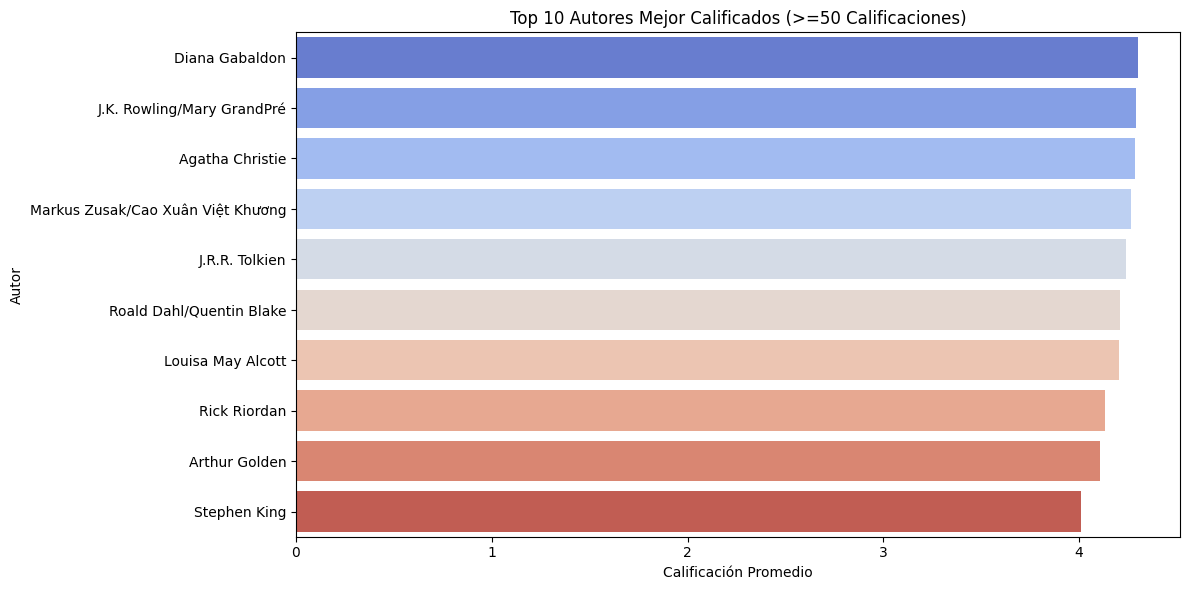

In [61]:
# Visualización: Top 10 autores mejor calificados con al menos 50 calificaciones
plt.figure(figsize=(12, 6))
sns.barplot(data=df4.head(10), x="avg_rating", y="author", palette="coolwarm")
plt.title("Top 10 Autores Mejor Calificados (>=50 Calificaciones)")
plt.xlabel("Calificación Promedio")
plt.ylabel("Autor")
plt.tight_layout()
plt.show()

El gráfico destaca que autores con narrativas envolventes, universos bien construidos (Gabaldon, Tolkien) o impacto cultural (Rowling, Christie) tienden a mantener calificaciones altas entre lectores activos. La presencia de autores variados sugiere que la calidad percibida trasciende géneros y épocas.

### Número promedio de reseñas entre usuarios que calificaron más de 50 libros

In [62]:
query5 = """
WITH active_users AS (
    SELECT username
    FROM ratings 
    GROUP BY username
    HAVING COUNT (*) > 50
)
SELECT
    ROUND (AVG(review_counts.num_reviews), 2) AS avg_reviews
FROM (
    SELECT r.username, COUNT(*) AS num_reviews
    FROM reviews r
    WHERE r.username IN (SELECT username FROM active_users)
    GROUP BY r.username
) AS review_counts;
"""
df5 = pd.io.sql.read_sql(query5, con=engine)
print("Número promedio de reseñas entre usuarios que calificaron más de 50 libros:", df5.iloc[0, 0])

Número promedio de reseñas entre usuarios que calificaron más de 50 libros: 24.33


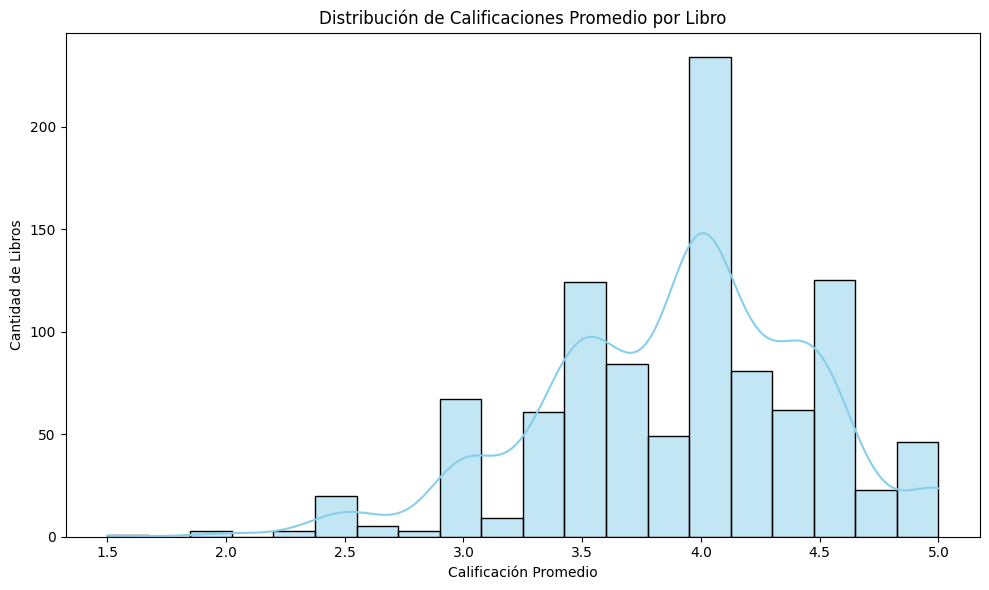

In [63]:
# Visualización adicional: Distribución de calificaciones promedio por libro
plt.figure(figsize=(10, 6))
sns.histplot(df2["avg_rating"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribución de Calificaciones Promedio por Libro")
plt.xlabel("Calificación Promedio")
plt.ylabel("Cantidad de Libros")
plt.tight_layout()
plt.show()

- Distribución de calificaciones promedio:

    - La mayoría de los libros tienen calificaciones promedio entre 3.0 y 4.5, lo que sugiere que los usuarios tienden a calificar positivamente los libros que han leído.

    - Hay pocos libros con calificaciones promedio extremas (inferiores a 2.0 o superiores a 4.5), lo que indica que las opiniones negativas o excepcionalmente positivas son menos comunes.

- Concentración de reseñas:

    - El gráfico muestra que los libros con calificaciones promedio en el rango de 3.5 a 4.0 podrían tener un mayor número de reseñas, ya que este intervalo parece ser el más frecuente. Esto sugiere que los libros con calificaciones moderadamente altas son los más populares entre los usuarios que han calificado más de 50 libros.